In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
link = 'https://courses.openedu.ru/assets/courseware/v1/f2906818eda8fcfc8f8416557ab1e6df/asset-v1:ITMOUniversity+DATANTECH2035+fall_2022_2+type@asset+block/diabetes.csv'
df = pd.read_csv(link)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
task_data = df.head(590)

In [ ]:
len(task_data)

590

In [ ]:
len(task_data[task_data['Outcome']==0])

386

In [ ]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

In [ ]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', #splitting criterion
                              min_samples_leaf=20, #minimum number of objects in a leaf
                              max_leaf_nodes=30, #maximum number of leaves
                              random_state=2020)
clf=tree.fit(x, y)

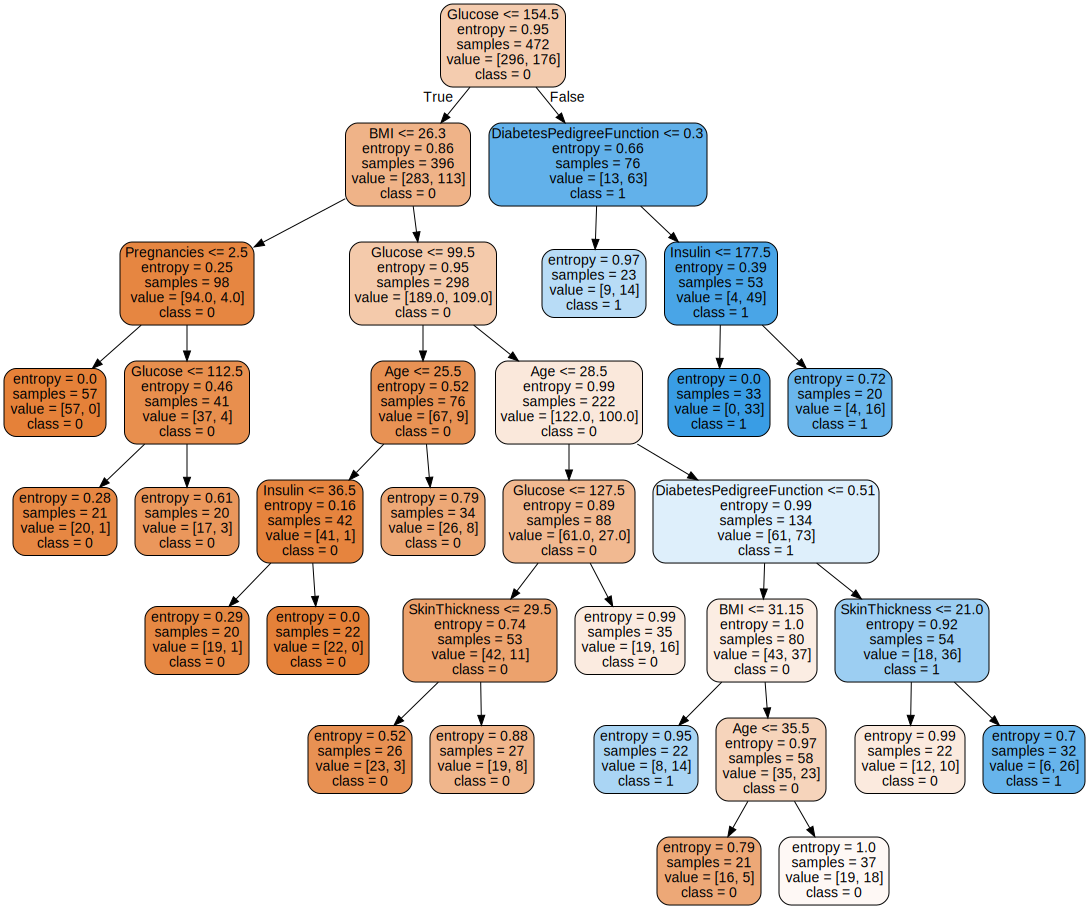

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot',
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False,
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
clf.tree_.max_depth

7

In [ ]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7627118644067796

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.6722222222222223

In [ ]:
df.loc[705, features]

,705
Pregnancies,6.000
Glucose,80.000
BloodPressure,80.000
SkinThickness,36.000
Insulin,0.000
BMI,39.800
DiabetesPedigreeFunction,0.177
Age,28.000


In [ ]:
X_new = pd.DataFrame([df.loc[729, features].tolist()], columns=features)
prediction = clf.predict(X_new)
prediction

array([0])